# Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]
print(C1.shape)
print(C2.shape)

(38,)
(37,)


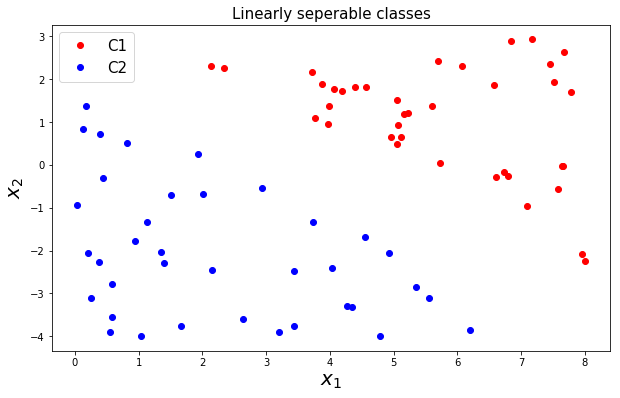

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()

In [3]:
X1 = np.hstack([x1[C1], x2[C1]])
X2 = np.hstack([x1[C2], x2[C2]])

X_ = np.vstack([X1, X2])
X = np.hstack([X_, np.ones([len(C1)+len(C2), 1])])

y1 = np.ones([len(C1), 1])
y2 = -np.ones([len(C2), 1])
Y = np.vstack([y1, y2])

In [4]:
print(X1.shape)
print(X2.shape)
print(X_.shape)
print(X.shape)
print(Y.shape)

(38, 2)
(37, 2)
(75, 2)
(75, 3)
(75, 1)


In [5]:
w = np.ones([3,1])

X = np.matrix(X)
W = np.matrix(w)
h = np.sign(X*W)

In [6]:
for i in range(100):
    
    h = np.sign(X*W)
    idx = np.where(h!=Y)[0]
    W = W + X[idx].T*Y[idx]
    
    print(len(idx))
    if len(idx)==0:
        print("Ended at : {}".format(i))
        break

29
40
26
10
6
7
6
6
7
6
6
7
6
5
5
3
2
2
2
1
1
1
1
1
1
1
1
1
1
0
Ended at : 29


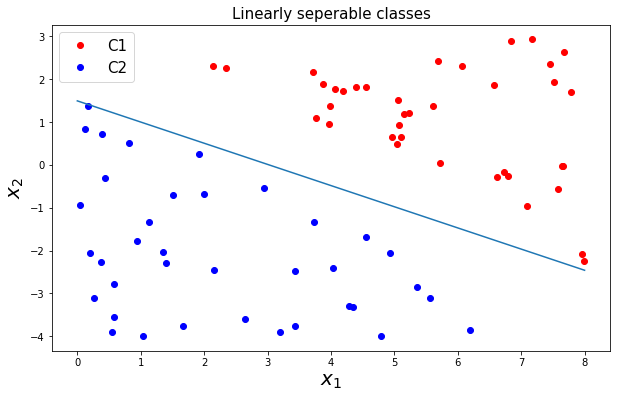

In [7]:
xp = np.linspace(0,8,10)
yp = -W[0,0]/W[1,0]*xp -W[2,0]/W[1,0]

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp,yp)
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()